# Principal Component Analysis
Unsupervised algorithm that reduces dimensions in a dataset by projecting it onto a lower dimensional subspace.

## Import Libraries

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [29]:
dataset = pd.read_csv("datasets/wine.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)

## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Apply PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Create Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Make Predictions

In [34]:
y_pred = classifier.predict(X_test)

In [63]:
n_test = [14.23, 1.71, 2.43, 15.6, 127, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065]
n_test = pca.transform(sc.transform([ n_test ]))

print(n_test)
print(classifier.predict(n_test))
# 

[[-3.27876676 -1.46926843]]
[1]


## Create Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[13  2  0]
 [ 0 18  0]
 [ 0  0 12]]
0.9555555555555556


## Visualize Results

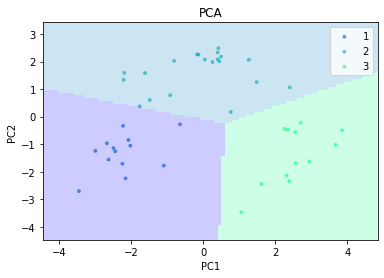

In [55]:
_X = X_test[:, 0]
_y = X_test[:, 1]

xmin, xmax = _X.min() - 1, _X.max() + 1
ymin, ymax = _y.min() - 1, _y.max() + 1

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

df = pd.DataFrame({
    "x": _X.flatten(),
    "y": _y.flatten(),
    "colors": y_pred.flatten()
})

norm = plt.Normalize(0, 3)
cmap = plt.cm.winter

for i, dff in df.groupby("colors"):
    plt.scatter(dff["x"], dff["y"], c=cmap(norm(dff["colors"])), s=8, alpha=0.5, label=i)

plt.pcolormesh(xx, yy, Z, cmap=cmap, alpha=0.2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.legend()
plt.show()
